<a href="https://colab.research.google.com/github/muditha11/Deep-Learning/blob/main/00_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 00 Pytorch Fundamentals

Select GPU from runtime-->change runtime

In [ ]:
!nvidia-smi

Tue Jan 17 14:12:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

1.13.0+cu116


### #Tensors

In [ ]:
#scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.dtype

torch.int64

In [ ]:
scalar.ndim

0

In [ ]:
#scalar to int 
scalar.item()

7

In [ ]:
#Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
#Matrix

MATRIX = torch.tensor([[7,8],
                        [9,10]])

MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[0]

tensor([7, 8])

In [ ]:
#TENSOR
TENSOR = torch.tensor([[[1,2,3],
                        [4,5,6],
                        [7,8,9]]])

TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
TENSOR[0][0]

tensor([1, 2, 3])

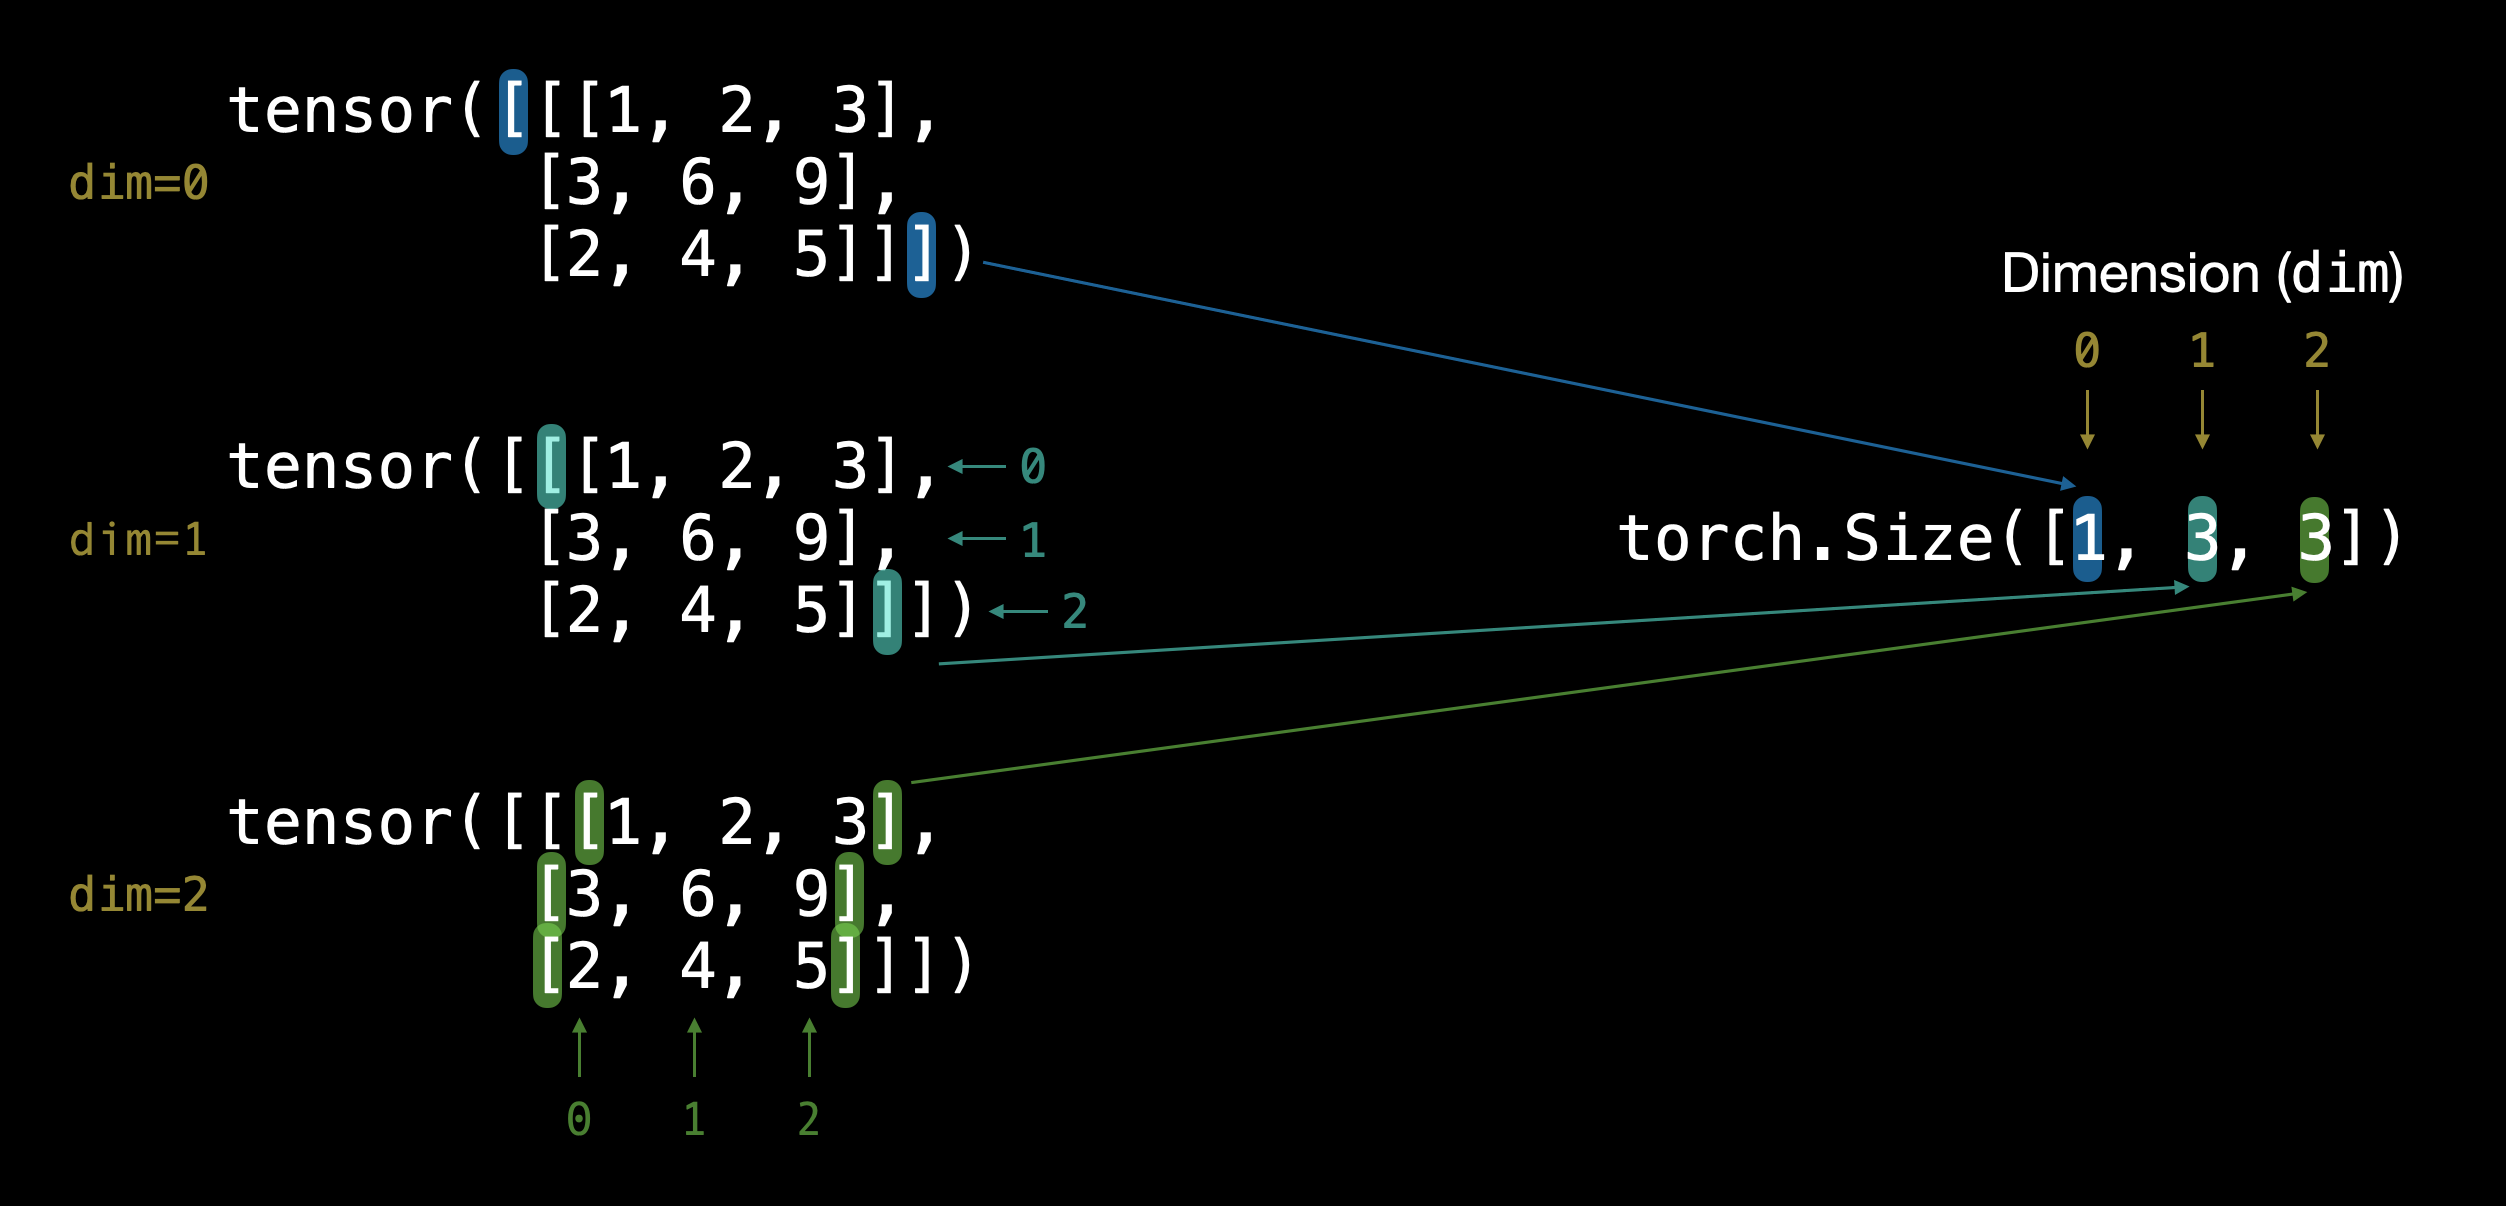

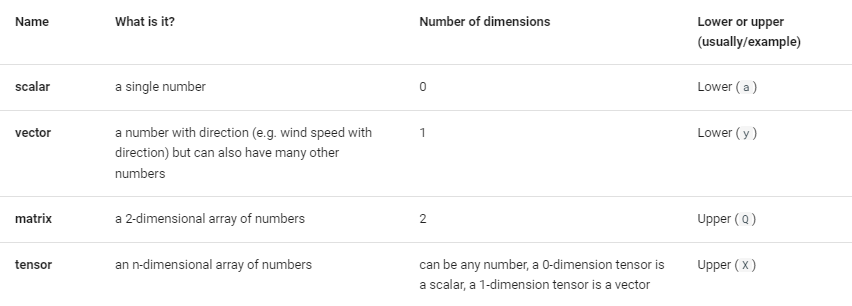

In [ ]:
#Random Tensors
# Neural Networks start with random tensors and continue to update them

In [ ]:
#Random Tensor of size (3,4)
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.1693, 0.4679, 0.6747, 0.6886],
        [0.0784, 0.0166, 0.3937, 0.4632],
        [0.5848, 0.3511, 0.5376, 0.2317]])

In [ ]:
#Random Tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224,224,3)) #height,width,color (RGB)
random_image_size_tensor.shape

torch.Size([224, 224, 3])

### #Zeros and Ones

In [ ]:
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### Range of tensors and tensors-like

In [ ]:
x = torch.arange(0,10)
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torch.arange(0,100,7)  #step=7

tensor([ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98])

In [ ]:
ten_zeros_like = torch.zeros_like(input=x)
ten_zeros_like

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor Data Types

In [ ]:
float_32_tensor = torch.tensor([3.0,6.0,9.0],
                               dtype = None,           #data type 16,32 bit floating point most used
                               device=None,            #default=cpu , can change to "cuda"
                               requires_grad=False)     #whether or not to track gradient with this tensors ops
float_32_tensor

tensor([3., 6., 9.])

In [ ]:
float_32_tensor.dtype

torch.float32

### Problems which occur when working with tensors


*   Tensors not right data type

> To get datatype use `tensor.dtype`


*   Tensors not right shape


> To get shape use `tensor.shape`



*   Tensors not on right device



> To get device use `tensor.device`







In [ ]:
#converting type
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

## Tensor Operations


### Operations

In [ ]:
#Add
tensor = torch.tensor([1,2,3])
tensor+10

tensor([11, 12, 13])

In [ ]:
tensor*10

tensor([10, 20, 30])

### Matrix Multiplication

In [ ]:
#Element wise
tensor*tensor

tensor([1, 4, 9])

In [ ]:
#Matrix Multiplication
%%time 
torch.matmul(tensor,tensor)

CPU times: user 2.2 ms, sys: 2.86 ms, total: 5.06 ms
Wall time: 6.65 ms


tensor(14)

In [ ]:
tensor @ tensor

tensor(14)

In [ ]:
#transpose
x = torch.tensor([[1,2,3],
                  [4,5,6]])
x.T

tensor([[1, 4],
        [2, 5],
        [3, 6]])

### Tensor Aggregation (Min,Max,Mean,Sum)

In [ ]:
x = torch.arange(0,100,10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
torch.min(x)

tensor(0)

In [ ]:
x.min(),x.max(),x.sum()

(tensor(0), tensor(90), tensor(450))

In [ ]:
x.type(torch.float32).mean()

tensor(45.)

In [ ]:
x.argmin() #index of minimum

tensor(0)

In [ ]:
x.argmax()

tensor(9)

### Reshaping,View,Stacking,Squeezing,Unsqueezing,Permute

In [ ]:
x = torch.arange(1,11)
x

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
x.reshape(2,5)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [ ]:
z = x.view(2,5)
#z and x share same memory,changes in z changes x
z

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [ ]:
x_stacked = torch.stack([x,x,x,x])
x_stacked

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [ ]:
x_stacked = torch.stack([x,x,x,x],dim=1)
x_stacked

tensor([[ 1,  1,  1,  1],
        [ 2,  2,  2,  2],
        [ 3,  3,  3,  3],
        [ 4,  4,  4,  4],
        [ 5,  5,  5,  5],
        [ 6,  6,  6,  6],
        [ 7,  7,  7,  7],
        [ 8,  8,  8,  8],
        [ 9,  9,  9,  9],
        [10, 10, 10, 10]])

In [ ]:
y = x.reshape(1,10)
y.shape,y

(torch.Size([1, 10]), tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]))

In [ ]:
y.squeeze(),y.squeeze().shape

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), torch.Size([10]))

In [ ]:
y.unsqueeze(dim=0),y.unsqueeze(dim=0).shape

(tensor([[[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]]), torch.Size([1, 1, 10]))

In [ ]:
y.permute(dims=(1,0))

tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]])

### Indexing

In [ ]:
x = torch.arange(1,10).reshape(1,3,3)
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
x[0][0]

tensor([1, 2, 3])

In [ ]:
x[0][0][0:2]

tensor([1, 2])

### Tensors and Numpy

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:

1.   `torch.from_numpy(ndarray)` - NumPy array -> PyTorch tensor.
2.   `torch.Tensor.numpy()` - PyTorch tensor -> NumPy array.



In [ ]:
#numpy-->pytorch
arr = np.arange(1,10)
tensor = torch.from_numpy(arr).type(torch.float32)
arr,tensor

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
arr = arr+1
arr,tensor

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
#torch-->numpy
tensor = torch.ones(1,10)
arr = tensor.numpy()
tensor,arr

(tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32))

In [ ]:
tensor = tensor+1
tensor,arr

(tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]]),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32))

### Reproducibility

In [ ]:
A = torch.rand(3,4)
B = torch.rand(3,4)
A,B

(tensor([[0.6073, 0.6658, 0.8671, 0.0535],
         [0.2489, 0.4308, 0.3706, 0.3708],
         [0.9271, 0.2818, 0.7145, 0.8592]]),
 tensor([[0.0460, 0.0638, 0.2430, 0.0655],
         [0.1836, 0.1743, 0.6844, 0.8860],
         [0.3610, 0.0182, 0.4925, 0.8045]]))

In [ ]:
A==B

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
Random_Seed = 100
torch.manual_seed(seed=Random_Seed)
C = torch.rand(3,4)

torch.manual_seed(seed=Random_Seed)
D = torch.rand(3,4)

C,D

(tensor([[0.1117, 0.8158, 0.2626, 0.4839],
         [0.6765, 0.7539, 0.2627, 0.0428],
         [0.2080, 0.1180, 0.1217, 0.7356]]),
 tensor([[0.1117, 0.8158, 0.2626, 0.4839],
         [0.6765, 0.7539, 0.2627, 0.0428],
         [0.2080, 0.1180, 0.1217, 0.7356]]))

In [ ]:
C==D

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### Tensors on GPU

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.cuda.device_count()

1

### Putting Tensors on GPU

In [ ]:
#CPU-->GPU
tensor = torch.tensor([1,2,3])
tensor,tensor.device

(tensor([1, 2, 3]), device(type='cpu'))

In [ ]:
tensor_gpu = tensor.to(device)
tensor_gpu,tensor_gpu.device

(tensor([1, 2, 3], device='cuda:0'), device(type='cuda', index=0))

In [ ]:
#CPU-->GPU
#When tensor is on GPU we cant convery it to numpy
tensor_gpu.numpy()

TypeError: ignored

In [ ]:
tensor_cpu = tensor_gpu.cpu()
tensor_cpu.numpy()

array([1, 2, 3])

## Exercises

In [ ]:
a = torch.rand(7,7)
a

tensor([[0.7118, 0.7876, 0.4183, 0.9014, 0.9969, 0.7565, 0.2239],
        [0.3023, 0.1784, 0.8238, 0.5557, 0.9770, 0.4440, 0.9478],
        [0.7445, 0.4892, 0.2426, 0.7003, 0.5277, 0.2472, 0.7909],
        [0.4235, 0.0169, 0.2209, 0.9535, 0.7064, 0.1629, 0.8902],
        [0.5163, 0.0359, 0.6476, 0.3430, 0.3182, 0.5261, 0.0447],
        [0.5123, 0.9051, 0.5989, 0.4450, 0.7278, 0.4563, 0.3389],
        [0.6211, 0.5530, 0.6896, 0.3687, 0.9053, 0.8356, 0.3039]])

In [ ]:
b = torch.rand(1,7)
a@b.T

tensor([[2.1382],
        [2.0473],
        [1.5819],
        [1.5302],
        [1.4366],
        [1.7534],
        [2.0031]])

In [ ]:
random_seed = 0
torch.manual_seed(seed=random_seed)
c = torch.rand(7,7)
d = torch.rand(1,7)
c@d.T

tensor([[1.8542],
        [1.9611],
        [2.2884],
        [3.0481],
        [1.7067],
        [2.5290],
        [1.7989]])